# Section 1

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
data = pd.read_csv('/content/drive/MyDrive/heart_failure.csv')
df = pd.DataFrame(data=data).astype('int32')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000,1,130,1,0,4,1
1,55,0,7861,0,38,0,263358,1,136,1,0,6,1
2,65,0,146,0,20,0,162000,1,129,1,1,7,1
3,50,1,111,0,20,0,210000,1,137,1,0,7,1
4,65,1,160,1,20,0,327000,2,116,0,0,8,1


In [29]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.026756,0.979933,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.098931,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.000000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.000000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.000000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.000000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.000000,148.000000,1.000000,1.00000,285.000000,1.00000


In [30]:

dead = df[df['DEATH_EVENT'] == 1]

alive = df[df['DEATH_EVENT'] == 0]

dead_idx = np.random.choice(dead.index, size=90, replace=False)

alive_idx = np.random.choice(alive.index, size=90, replace=False)


dead_df = df.iloc[dead_idx]
alive_df = df.iloc[alive_idx]

selected_indices = np.concatenate([dead_idx, alive_idx])

sample_df = df.loc[selected_indices]
sample_df = sample_df.sample(frac=1, random_state=42)

# Section 2

In [31]:
dead_df = dead_df.drop('DEATH_EVENT', axis=1)
alive_df =alive_df.drop('DEATH_EVENT', axis=1)

In [32]:
from sklearn.preprocessing import StandardScaler

columns = dead_df.columns

scaler = StandardScaler()
scaled_dead_df = pd.DataFrame(scaler.fit_transform(dead_df))
scaled_alive_df = pd.DataFrame(scaler.fit_transform(alive_df))

scaled_alive_df.columns = dead_df.columns
scaled_dead_df.columns = alive_df.columns

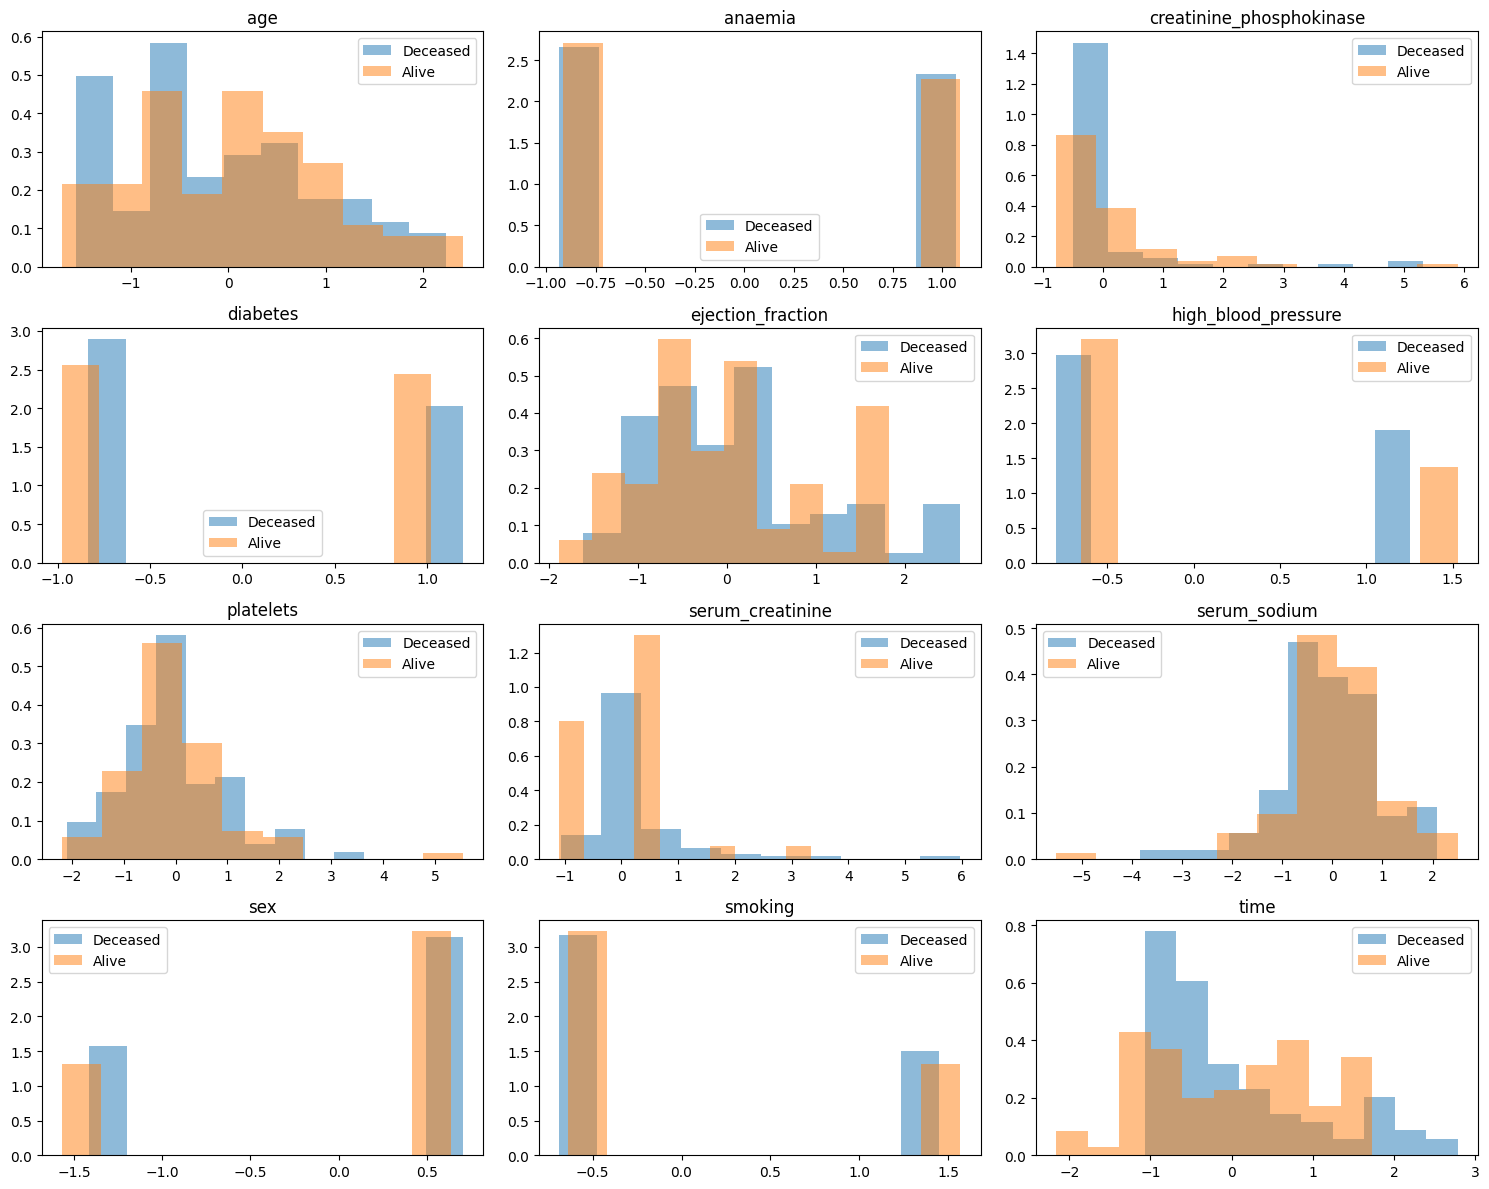

In [33]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))

for i, column in enumerate(columns):
    ax = axes[i // 3, i % 3]
    ax.hist(scaled_dead_df[column], label='Deceased', alpha=0.5, density=True)
    ax.hist(scaled_alive_df[column], label='Alive', alpha=0.5, density=True)
    ax.set_title(column)
    ax.legend()

plt.tight_layout()

plt.show()


# Section 3


In [34]:
X = sample_df.drop('DEATH_EVENT', axis=1)
y = sample_df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

svm_model = SVC()

grid_search = GridSearchCV(svm_model, param_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.7701970443349755


# Section 4

In [35]:
X = sample_df['time'].values.reshape(-1, 1)
y = sample_df['DEATH_EVENT']

svm_model = SVC(C=0.1, gamma=0.1, kernel='linear')

k = 5  
scores = cross_val_score(svm_model, X, y, cv=k)

for fold, score in enumerate(scores):
    print(f"Accuracy for Fold {fold+1}: {score}")

mean_accuracy = np.mean(scores)
print("Mean Accuracy:", mean_accuracy)


Accuracy for Fold 1: 0.75
Accuracy for Fold 2: 0.6944444444444444
Accuracy for Fold 3: 0.75
Accuracy for Fold 4: 0.7777777777777778
Accuracy for Fold 5: 0.6111111111111112
Mean Accuracy: 0.7166666666666667


# Section 5


In [36]:
for column in sample_df.columns:
    if column != 'DEATH_EVENT':
        X = sample_df[column].values.reshape(-1, 1)
        y = sample_df['DEATH_EVENT']
        
        svm_model = SVC(C=0.1, gamma=0.1, kernel='linear')
        
        K = 5  
        scores = cross_val_score(svm_model, X, y, cv=K)
        
        average_accuracy = np.mean(scores)
        
        print("Column: {}, accuracy: {:.2f}".format(column, average_accuracy))

Column: age, accuracy: 0.59
Column: anaemia, accuracy: 0.46
Column: creatinine_phosphokinase, accuracy: 0.52
Column: diabetes, accuracy: 0.54
Column: ejection_fraction, accuracy: 0.59
Column: high_blood_pressure, accuracy: 0.54
Column: platelets, accuracy: 0.44
Column: serum_creatinine, accuracy: 0.62
Column: serum_sodium, accuracy: 0.62
Column: sex, accuracy: 0.52
Column: smoking, accuracy: 0.46
Column: time, accuracy: 0.72


# Section 6


In [37]:
for column in sample_df.columns:
    if column != 'DEATH_EVENT' and column != 'time':
        X = sample_df[['time', column]]
        y = sample_df['DEATH_EVENT']
        
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        svm_model = SVC(C=0.1, gamma=0.1, kernel='linear')
        
        K = 5 
        scores = cross_val_score(svm_model, X_scaled, y, cv=K)
        
        average_accuracy = np.mean(scores)
        
        print("Columns: time, {}, accuracy: {:.3f}".format(column, average_accuracy))


Columns: time, age, accuracy: 0.744
Columns: time, anaemia, accuracy: 0.722
Columns: time, creatinine_phosphokinase, accuracy: 0.733
Columns: time, diabetes, accuracy: 0.717
Columns: time, ejection_fraction, accuracy: 0.750
Columns: time, high_blood_pressure, accuracy: 0.722
Columns: time, platelets, accuracy: 0.717
Columns: time, serum_creatinine, accuracy: 0.778
Columns: time, serum_sodium, accuracy: 0.733
Columns: time, sex, accuracy: 0.722
Columns: time, smoking, accuracy: 0.722
